In [1]:
import json
import pandas as pd
from textblob import TextBlob
import string
from gensim import corpora
import gensim
from gensim.models import CoherenceModel
from pprint import pprint
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from extract_dataframe import read_json
from extract_dataframe import TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets

import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis


In [2]:
_, tweet_list = read_json("data/global_twitter_data.json")

In [3]:
tweets = TweetDfExtractor(tweet_list)
df = tweets.get_tweet_df()

In [4]:
cl = Clean_Tweets(df)
df = cl.clean_tweet_original_text(df)
df

Automation in Action...!!!


,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,screen_name,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,Iban Ameztoy,20497,2621,False,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",,extra random image i lets focus in one very s...
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,Earth Is Not Flat,65,272,False,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",,chinas media explains the military reasons fo...
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,JJ,85,392,False,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands,china even cut off communication they dont anw...
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,JJ,85,392,False,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands,putin to xijinping i told you my friend taiwa...
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,Dolores Vizzini,910,2608,False,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz",im sorry i thought taiwan was an independent ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Sat Aug 06 18:03:29 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000,en,0,183,VandelayT,Vandelay Technology,62,471,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",,a good infographic of chinas missile launches...
21996,Sat Aug 06 18:03:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000,en,0,183,sashalenik,Sasha Usenco ⚒,94,1751,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",Gelendzhik,a good infographic of chinas missile launches...
21997,Sat Aug 06 18:03:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@Reuters Thanks #Pelosi smart move.,2.071429e-01,0.421429,en,0,0,ZeitounRimal,Zeitoun Rimal 🕊️,88,0,False,"[{'text': 'Pelosi', 'indices': [16, 23]}]","[{'screen_name': 'Reuters', 'name': 'Reuters',...",🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈,thanks pelosi smart move
21998,Sat Aug 06 18:03:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #Taiwan people's Desire for ...,5.000000e-02,0.350000,en,0,67,SazzyCowgirl1,ℐ 𝒜𝓂 𝒦𝓇𝒾𝓈 💋,537,317,False,"[{'text': 'Taiwan', 'indices': [18, 25]}, {'te...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...","Oregon, USA",taiwan peoples desire for unification with ch...


In [5]:
def clean_text(txt):
    txt = re.sub(r"RT[\s]+", "", txt)
    txt = txt.replace("\n", " ")
    txt = re.sub(" +", " ", txt)
    txt = re.sub(r"https?:\/\/\S+", "", txt)
    txt = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#", "", txt)
    #txt = emoji.replace_emoji(txt, replace='')
    txt.strip()
    return txt

df["clean_text"] = df["original_text"].apply(clean_text)
df['clean_text']=df['clean_text'].astype(str)
df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
df['clean_text']= df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [6]:
sentence_list = [tweet for tweet in df['clean_text']]
sentence_list

[' extra random image i lets focus in one very specific zone of the western coast gt longjing district taichung city ta',
 ' chinas media explains the military reasons for each area of the drills in the taiwan strait read the labels in the pi',
 'china even cut off communication they dont anwer phonecalls from the us but here clown  enters the stage to ask xijinping to change putins mind',
 'putin to xijinping  i told you my friend taiwan will be a vassal state including nukes much like the ukrainian model i warned you but it took pelosi to open chinas eyes',
 ' im sorry i thought taiwan was an independent country because it had its own government currency military travel d',
 ' we must not let this happen we must be ready we must defend taiwan ',
 ' what kind of country can connive such extremely offensive remarks on the street taiwan tsaiingwen thegreattranslati',
 '777 pinkfloyd singer roger waters rebukes and says taiwan is a part of china if you dont know that go and educate yours

In [7]:
word_list = [sent.split() for sent in sentence_list]
word_list

[['extra',
  'random',
  'image',
  'i',
  'lets',
  'focus',
  'in',
  'one',
  'very',
  'specific',
  'zone',
  'of',
  'the',
  'western',
  'coast',
  'gt',
  'longjing',
  'district',
  'taichung',
  'city',
  'ta'],
 ['chinas',
  'media',
  'explains',
  'the',
  'military',
  'reasons',
  'for',
  'each',
  'area',
  'of',
  'the',
  'drills',
  'in',
  'the',
  'taiwan',
  'strait',
  'read',
  'the',
  'labels',
  'in',
  'the',
  'pi'],
 ['china',
  'even',
  'cut',
  'off',
  'communication',
  'they',
  'dont',
  'anwer',
  'phonecalls',
  'from',
  'the',
  'us',
  'but',
  'here',
  'clown',
  'enters',
  'the',
  'stage',
  'to',
  'ask',
  'xijinping',
  'to',
  'change',
  'putins',
  'mind'],
 ['putin',
  'to',
  'xijinping',
  'i',
  'told',
  'you',
  'my',
  'friend',
  'taiwan',
  'will',
  'be',
  'a',
  'vassal',
  'state',
  'including',
  'nukes',
  'much',
  'like',
  'the',
  'ukrainian',
  'model',
  'i',
  'warned',
  'you',
  'but',
  'it',
  'took',
  '

In [8]:
word_to_id = corpora.Dictionary(word_list)
word_to_id

In [9]:
corpus= [word_to_id.doc2bow(tweet) for tweet in word_list]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(8, 2),
  (11, 1),
  (17, 5),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1)],
 [(17, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1)],
 [(6, 2),
  (17, 1),
  (22, 1),
  (34, 1),
  (37, 1),
  (54, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 2)],
 [(6, 1),
  (29, 1

In [10]:
lda_model = gensim.models.ldamodel.LdaModel(
    corpus,
    id2word=word_to_id,
    num_topics=5,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

In [11]:
pprint(lda_model.print_topics())

[(0,
  '0.039*"taiwan" + 0.032*"a" + 0.031*"to" + 0.027*"china" + 0.022*"in" + '
  '0.017*"the" + 0.015*"not" + 0.014*"on" + 0.014*"and" + 0.013*"good"'),
 (1,
  '0.031*"it" + 0.025*"to" + 0.025*"taiwan" + 0.024*"i" + 0.021*"was" + '
  '0.020*"an" + 0.020*"you" + 0.019*"its" + 0.017*"your" + 0.017*"china"'),
 (2,
  '0.079*"the" + 0.065*"taiwan" + 0.050*"of" + 0.032*"on" + 0.027*"to" + '
  '0.016*"and" + 0.015*"in" + 0.015*"chinas" + 0.015*"military" + '
  '0.013*"with"'),
 (3,
  '0.040*"the" + 0.027*"to" + 0.023*"china" + 0.023*"in" + 0.021*"that" + '
  '0.020*"is" + 0.019*"visit" + 0.019*"taiwan" + 0.019*"taiwans" + 0.017*"a"'),
 (4,
  '0.070*"is" + 0.042*"by" + 0.030*"war" + 0.029*"part" + 0.029*"taiwan" + '
  '0.028*"president" + 0.022*"watch" + 0.016*"are" + 0.016*"did" + '
  '0.015*"you"')]


In [12]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -7.284065076814483


In [13]:
coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=word_list,
    dictionary=word_to_id,
    coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()

In [14]:
pyLDAvis.enable_notebook()

LDAvis_prepend = gensimvis.prepare(lda_model,corpus,word_to_id)

LDAvis_prepend

/home/sennay/anaconda3/envs/ten-academy/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/sennay/anaconda3/envs/ten-academy/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/sennay/anaconda3/envs/ten-academy/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/sennay/anaconda3/envs/ten-academy/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp imp

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.170771 -0.094716       1        1  32.667746
3      0.160629 -0.094564       2        1  25.328198
0      0.052332  0.053145       3        1  21.817134
1     -0.311271 -0.160997       4        1  10.510418
4     -0.072461  0.297132       5        1   9.676504, topic_info=       Term          Freq         Total Category  logprob  loglift
119      is   6734.000000   6734.000000  Default  30.0000  30.0000
142      by   2920.000000   2920.000000  Default  29.0000  29.0000
17      the  17498.000000  17498.000000  Default  28.0000  28.0000
62       it   1635.000000   1635.000000  Default  27.0000  27.0000
127    that   2220.000000   2220.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
98      not    416.316831   1853.184004   Topic5  -4.5938   0.8423
17      the    548.377874  17498.913788   Topic5  -4.3183  -1.1275
22   chinas    408.302705   3111.430303   Topic5  -4.6133   0.3046
11       of    421.253929   9650.226684   Topic5  -4.5820  -0.7960
107      on    384.826925   7342.806753   Topic5  -4.6725  -0.6132

[276 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
199       1  0.997763          1
403       1  0.444618        120
403       2  0.033016        120
403       4  0.521656        120
239       5  0.996582         17
...     ...       ...        ...
56        3  0.998707  xijinping
140       5  0.996650         yi
78        4  0.589431        you
78        5  0.410473        you
531       4  0.998853       your

[298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5])

In [15]:
plot_size = plt.rcParams["figure.figsize"]
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

%matplotlib inline

In [16]:
sns.set(rc={'figure.figsize':(14,10)})
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
for index, row in df['clean_text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
df

/home/sennay/anaconda3/envs/ten-academy/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/sennay/anaconda3/envs/ten-academy/lib/python3.9/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sennay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,screen_name,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text,sentiment
0,Sun Aug 07 22:31:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,0,2,i_ameztoy,Iban Ameztoy,20497,2621,False,"[{'text': 'City', 'indices': [132, 137]}]","[{'screen_name': 'i_ameztoy', 'name': 'Iban Am...",,extra random image i lets focus in one very s...,positive
1,Sun Aug 07 22:31:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,0,201,ZIisq,Earth Is Not Flat,65,272,False,"[{'text': 'China', 'indices': [18, 24]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",,chinas media explains the military reasons fo...,neutral
2,Sun Aug 07 22:31:07 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,0,0,Fin21Free,JJ,85,392,False,"[{'text': 'XiJinping', 'indices': [127, 137]}]","[{'screen_name': 'ZelenskyyUa', 'name': 'Волод...",Netherlands,china even cut off communication they dont anw...,negative
3,Sun Aug 07 22:31:06 +0000 2022,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,0,0,Fin21Free,JJ,85,392,False,"[{'text': 'XiJinping', 'indices': [9, 19]}]",[],Netherlands,putin to xijinping i told you my friend taiwa...,positive
4,Sun Aug 07 22:31:04 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,0,381,VizziniDolores,Dolores Vizzini,910,2608,False,[],"[{'screen_name': 'ChinaUncensored', 'name': 'C...","Ayent, Schweiz",im sorry i thought taiwan was an independent ...,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,Sat Aug 06 18:03:29 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000,en,0,183,VandelayT,Vandelay Technology,62,471,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",,a good infographic of chinas missile launches...,positive
21996,Sat Aug 06 18:03:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: A good infographic of #China...,7.000000e-01,0.600000,en,0,183,sashalenik,Sasha Usenco ⚒,94,1751,False,"[{'text': 'China', 'indices': [40, 46]}, {'tex...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...",Gelendzhik,a good infographic of chinas missile launches...,positive
21997,Sat Aug 06 18:03:27 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",@Reuters Thanks #Pelosi smart move.,2.071429e-01,0.421429,en,0,0,ZeitounRimal,Zeitoun Rimal 🕊️,88,0,False,"[{'text': 'Pelosi', 'indices': [16, 23]}]","[{'screen_name': 'Reuters', 'name': 'Reuters',...",🇺🇲🇷🇺🇺🇦🇫🇷🇦🇪🇮🇱🏳️‍🌈,thanks pelosi smart move,positive
21998,Sat Aug 06 18:03:26 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #Taiwan people's Desire for ...,5.000000e-02,0.350000,en,0,67,SazzyCowgirl1,ℐ 𝒜𝓂 𝒦𝓇𝒾𝓈 💋,537,317,False,"[{'text': 'Taiwan', 'indices': [18, 25]}, {'te...","[{'screen_name': 'IndoPac_Info', 'name': 'Indo...","Oregon, USA",taiwan peoples desire for unification with ch...,negative


<AxesSubplot:ylabel='sentiment'>

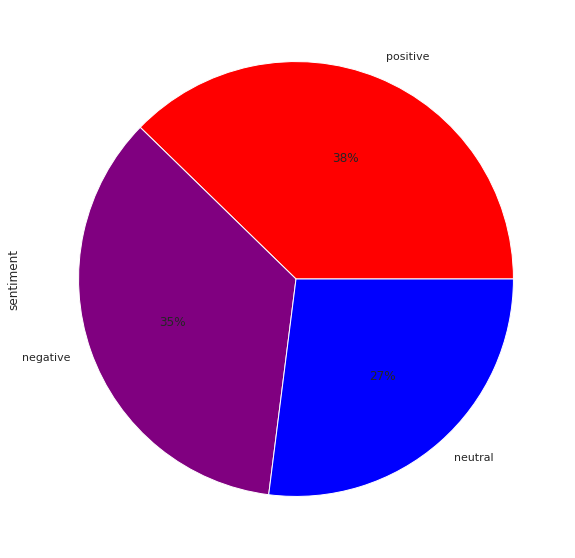

In [17]:
df.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "purple", "blue"])

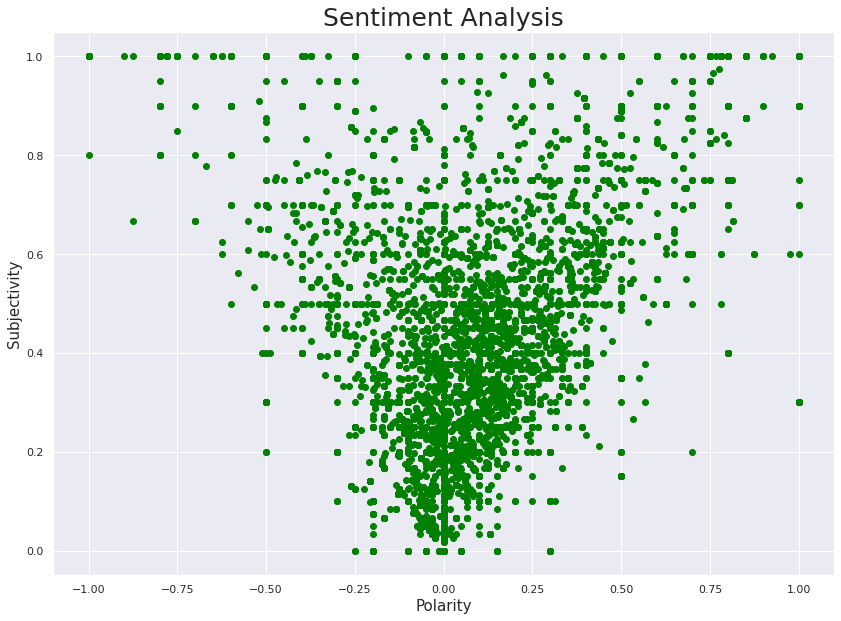

In [18]:
x = df.polarity
y = df.subjectivity

plt.scatter(x,y,color='green')

plt.title('Sentiment Analysis', fontsize=25)
plt.xlabel('Polarity', fontsize=15)
plt.ylabel('Subjectivity', fontsize=15)

plt.show()